# Time Series Basics

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

### Plot the time series

In [ ]:
def plot_series(time, series): 
  plt.figure(figsize=(10, 6))
  plt.plot(time, series)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.grid(True)
  plt.show()

### Plot the trend

In [ ]:
def trend(time, slope=0): 
  return slope*time

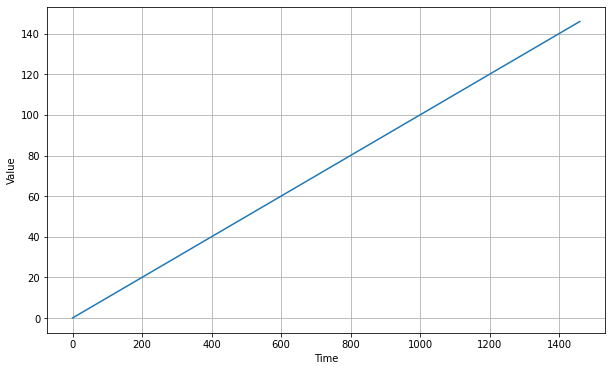

In [ ]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)
plot_series(time, series)

In [ ]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

### Plot the trend by season

In [ ]:
def seasonal_pattern(season_time): 
  return np.where(season_time < 0.4, 
                  np.cos(season_time * 2 * np.pi), 
                  1 / np.exp(3 * season_time))

#
def seasonality(time, period, amplitude=1, phase=0): 
  season_time = ((time+phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

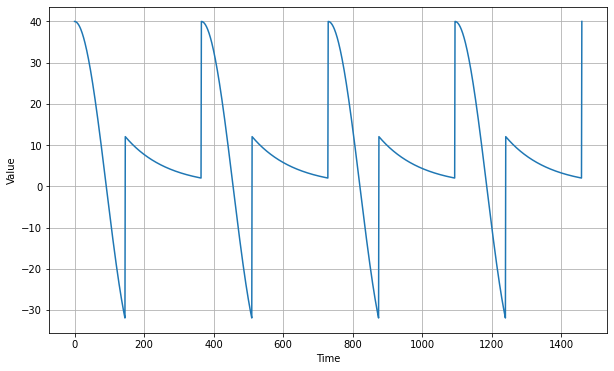

In [ ]:
baseline = 10, 
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)

### Display the noise

In [ ]:
def noise(time, noise_level=1): 
  return np.random.randn(len(time)) * noise_level

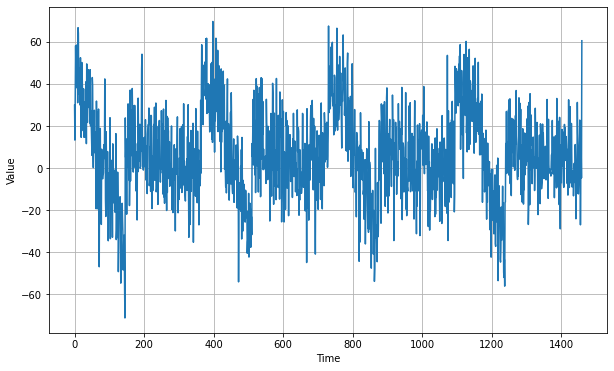

In [ ]:
noise_level = 15
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

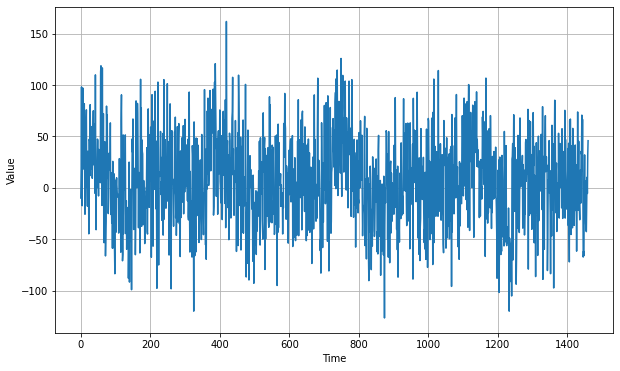

In [ ]:
noise_level = 40
noisy_series = series + noise(time, noise_level)
plot_series(time, noisy_series)

### Display correlation - avoid having correlation


In [ ]:
# Display correlation - avoid having correlation
def autocorrelation(time, amplitude): 
  rho1 = 0.5
  rho2 = -0.1
  ar = np.random.randn(len(time) + 50)
  ar[:50] = 100

  for step in range(50, len(time) + 50): 
    ar[step] += rho1 * ar[step - 50]
    ar[step] += rho2 * ar[step - 33]
  
  return ar[50:] * amplitude

In [ ]:
def autocorrelation(time, amplitude): 
  rho = 0.8
  ar = np.random.randn(len(time) + 1)

  for step in range(1, len(time) + 1): 
    ar[step] += rho * ar[step - 1]
  
  return ar[1:] * amplitude

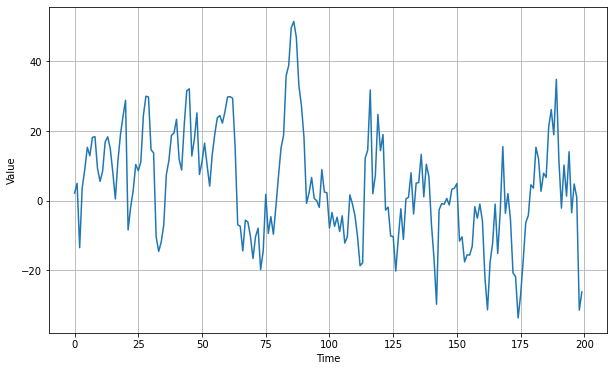

In [ ]:
series = autocorrelation(time, 10)
plot_series(time[:200], series[:200])

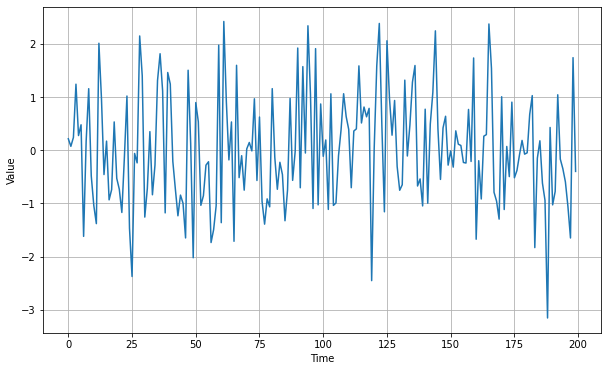

In [ ]:
series = noise(time)
plot_series(time[:200], series[:200])

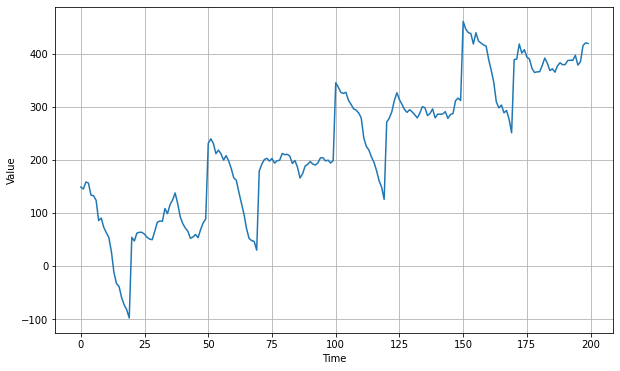

In [ ]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])

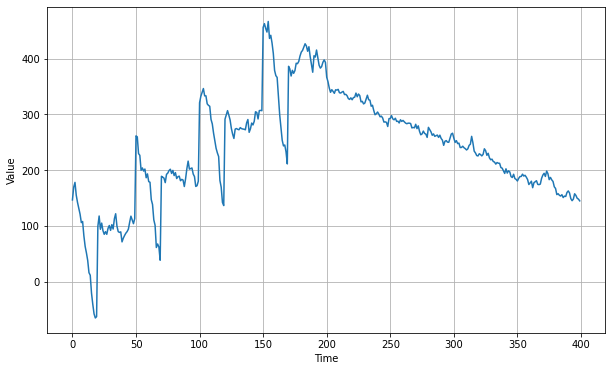

In [ ]:
series = autocorrelation(time, 10) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation(time, 5) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

series[200:] = series2[200:]
plot_series(time[:400], series[:400])